In [11]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

In [3]:
from data_processing import process_data

In [4]:
def evaluate_prediction(y_test, y_predicted):
    acc = accuracy_score(y_test, y_predicted)
    f1 = f1_score(y_test, y_predicted, average='macro')
    prec = precision_score(y_test, y_predicted, average='macro', zero_division=0)
    rec = precision_score(y_test, y_predicted, average='macro')
    confMat = confusion_matrix(y_test, y_predicted)
    
    return {"accuracy": acc, "f1": f1, "precision": prec, "recall": rec, "confusion_matrix": confMat}

In [5]:
data = process_data()
data.shape

/home/mira/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(19348, 612)

In [6]:
data.columns.values

array(['match_id', 'stage', 'home_buildUpPlaySpeed',
       'home_buildUpPlayPassing', 'home_chanceCreationPassing',
       'home_chanceCreationShooting', 'home_defencePressure',
       'home_defenceAggression', 'home_defenceTeamWidth',
       'away_buildUpPlaySpeed', 'away_buildUpPlayPassing',
       'away_chanceCreationPassing', 'away_chanceCreationShooting',
       'away_defencePressure', 'away_defenceAggression',
       'away_defenceTeamWidth', 'home_mean_height', 'away_mean_height',
       'home_mean_weight', 'away_mean_weight', 'home_mean_age',
       'away_mean_age', 'home_std_height', 'away_std_height',
       'home_std_weight', 'away_std_weight', 'home_std_age',
       'away_std_age', 'match_outcome', 'season_2009/2010',
       'season_2010/2011', 'season_2011/2012', 'season_2012/2013',
       'season_2013/2014', 'season_2014/2015', 'season_2015/2016',
       'country_id_1', 'country_id_1729', 'country_id_4769',
       'country_id_7809', 'country_id_10257', 'country_id_13274',

In [7]:
data.head()

,match_id,stage,home_buildUpPlaySpeed,home_buildUpPlayPassing,home_chanceCreationPassing,home_chanceCreationShooting,home_defencePressure,home_defenceAggression,home_defenceTeamWidth,away_buildUpPlaySpeed,...,away_team_id_10265,away_team_id_10267,away_team_id_10268,away_team_id_10269,away_team_id_10278,away_team_id_10281,away_team_id_108893,away_team_id_158085,away_team_id_208931,away_team_id_274581
0,414,23,45,35,70,55,65,60,70,40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,421,24,40,50,45,60,70,70,70,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,424,24,65,60,50,40,65,70,70,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,434,26,40,50,45,60,70,70,70,50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,435,26,45,35,70,55,65,60,70,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
y = data['match_outcome']
X = data.drop(columns=['match_outcome'], axis=1)

In [6]:
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size = 0.8, random_state=40)

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
svd = TruncatedSVD(n_components = 400)

In [9]:
svd.fit(X_train)

TruncatedSVD(n_components=400)

In [10]:
X_train_PCA = svd.transform(X_train)
X_test_PCA = svd.transform(X_test)

## Logistic Regression

### l1 regularization

In [11]:
model = LogisticRegression(solver='liblinear', penalty='l1', max_iter=500)
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'class_weight': [None, 'balanced'],
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_PCA, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_predicted = best_model.predict(X_test_PCA)
evaluation = evaluate_prediction(y_test, y_predicted)
print(evaluation)

Best Parameters: {'C': 0.1, 'class_weight': None}
{'accuracy': 0.5028423772609819, 'f1': 0.39095747117429464, 'precision': 0.43272255956819716, 'recall': 0.43272255956819716, 'confusion_matrix': array([[ 456,   57,  560],
       [ 246,   56,  688],
       [ 306,   67, 1434]])}


### l2 regularization

In [12]:
model = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=500)
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'class_weight': [None, 'balanced'],
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_PCA, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_predicted = best_model.predict(X_test_PCA)
evaluation = evaluate_prediction(y_test, y_predicted)
print(evaluation)

Best Parameters: {'C': 0.1, 'class_weight': None}
{'accuracy': 0.4979328165374677, 'f1': 0.3973993406466607, 'precision': 0.4233805011239215, 'recall': 0.4233805011239215, 'confusion_matrix': array([[ 462,   88,  523],
       [ 251,   74,  665],
       [ 315,  101, 1391]])}


### elasticnet regularization

In [13]:
model = LogisticRegression(solver='saga', penalty='elasticnet', max_iter=5000)
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'l1_ratio':[0, 0.5, 1]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_PCA, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_predicted = best_model.predict(X_test_PCA)
evaluation = evaluate_prediction(y_test, y_predicted)
print(evaluation)

/home/mira/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mira/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mira/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mira/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mira/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mira/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarn

Best Parameters: {'C': 0.1, 'l1_ratio': 1}
{'accuracy': 0.5031007751937985, 'f1': 0.3986280585832096, 'precision': 0.43726290270785473, 'recall': 0.43726290270785473, 'confusion_matrix': array([[ 460,   67,  546],
       [ 244,   71,  675],
       [ 307,   84, 1416]])}


## k-Nearest Neighbors

In [14]:
model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'], # handling imbalansed data in this algorithm
    'metric': ['euclidean', 'manhattan']
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_PCA, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_predicted = best_model.predict(X_test_PCA)
evaluation = evaluate_prediction(y_test, y_predicted)
print(evaluation)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
{'accuracy': 0.4682170542635659, 'f1': 0.40608913752563097, 'precision': 0.4108507517544589, 'recall': 0.4108507517544589, 'confusion_matrix': array([[ 434,  199,  440],
       [ 284,  166,  540],
       [ 364,  231, 1212]])}


## Support Vector Machine

In [11]:
model = SVC(kernel='linear')
param_grid = {
    'C': [0.1, 1.0]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_PCA, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_predicted = best_model.predict(X_test_PCA)
evaluation = evaluate_prediction(y_test, y_predicted)
print(evaluation)

Best Parameters: {'C': 1.0}
{'accuracy': 0.5077519379844961, 'f1': 0.3690068313726808, 'precision': 0.4106410832806297, 'recall': 0.4106410832806297, 'confusion_matrix': array([[ 431,   22,  620],
       [ 240,   15,  735],
       [ 263,   25, 1519]])}


## Decision Tree

In [13]:
model = DecisionTreeClassifier()
param_grid = {
    'max_depth': [5, 10, 15, 20],    # Maximum depth of the tree
    'class_weight': [None, 'balanced']
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_PCA, y_train)
print("Best Parameters:, 100.0", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_predicted = best_model.predict(X_test_PCA)
evaluation = evaluate_prediction(y_test, y_predicted)
print(evaluation)

Best Parameters:, 100.0 {'class_weight': None, 'max_depth': 5}
{'accuracy': 0.4669250645994832, 'f1': 0.2771774960899296, 'precision': 0.34228811933696673, 'recall': 0.34228811933696673, 'confusion_matrix': array([[ 148,    1,  924],
       [ 136,    1,  853],
       [ 146,    3, 1658]])}


## Random Forest

In [14]:
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15, 20],
    'class_weight': [None, 'balanced'],
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_PCA, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_predicted = best_model.predict(X_test_PCA)
evaluation = evaluate_prediction(y_test, y_predicted)
print(evaluation)

Best Parameters: {'class_weight': None, 'max_depth': 10, 'n_estimators': 150}
{'accuracy': 0.49844961240310076, 'f1': 0.31670493701250885, 'precision': 0.4382388473761414, 'recall': 0.4382388473761414, 'confusion_matrix': array([[ 200,   14,  859],
       [ 103,   11,  876],
       [  76,   13, 1718]])}


# Comparison of results

In [8]:
def plot(data, measure):
    algorithm_names = ['Logistic Regression(l1 regularization)', 'Logistic Regression(l2 regularization)', 'Logistic Regression(elasticnet regularization)', 'k-Nearest Neighbors', 'Support Vector Machine', 'Decision Tree', 'Random Forest']
 
    plt.figure(figsize=(10, 6))
    bars = plt.bar(algorithm_names, data, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')

    plt.xticks(rotation=90)

    plt.xlabel('Algorithm')
    plt.ylabel(measure)
    plt.title('Comparison of Model ' + measure)
    plt.ylim(0, 1)
    plt.show()

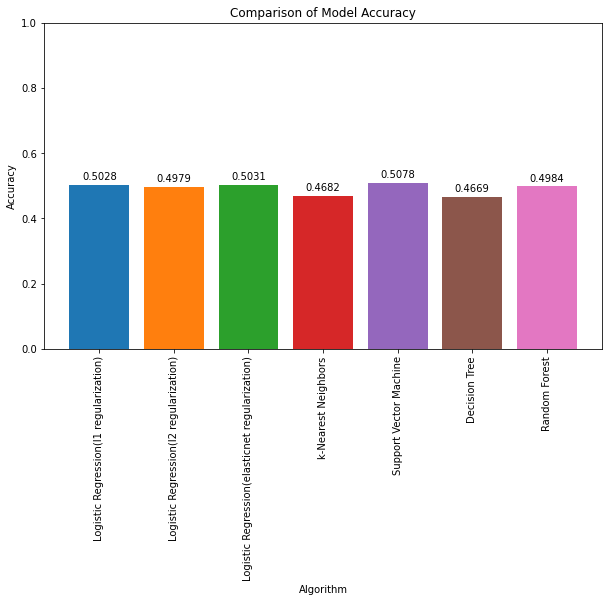

In [12]:
accuracy = [0.5028, 0.4979, 0.5031, 0.4682, 0.5078, 0.4669, 0.4984]
plot(accuracy, 'Accuracy')

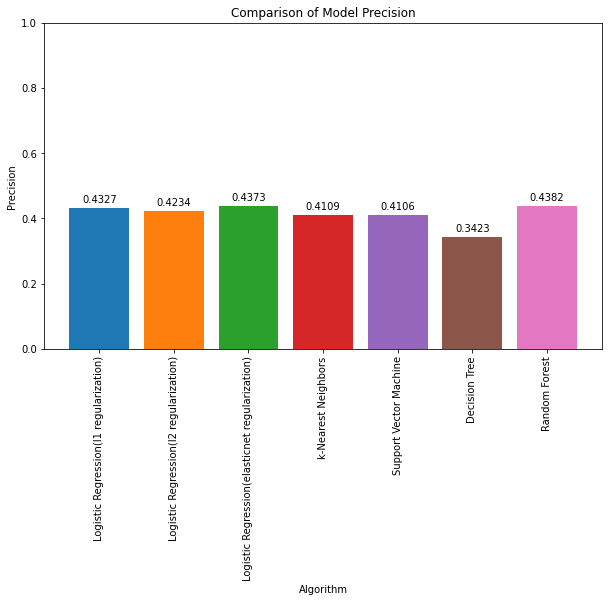

In [14]:
precision = [0.4327, 0.4234, 0.4373, 0.4109, 0.4106, 0.3423, 0.4382]
plot(precision, 'Precision')

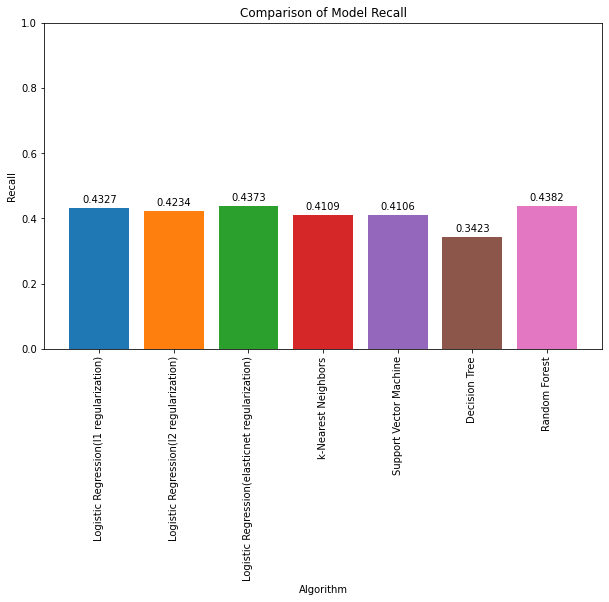

In [13]:
recall = [0.4327, 0.4234, 0.4373, 0.4109, 0.4106, 0.3423, 0.4382]
plot(recall, 'Recall')

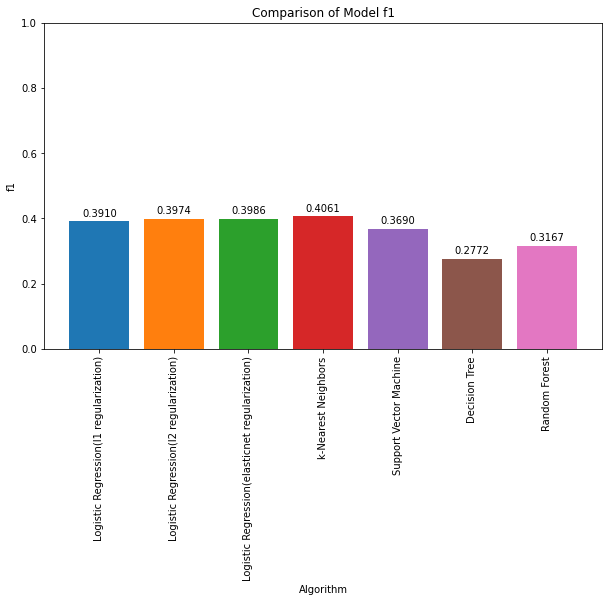

In [15]:
f1 = [0.391, 0.3974, 0.3986, 0.4061, 0.369, 0.2772, 0.3167]
plot(f1, 'f1')